<a href="https://colab.research.google.com/github/adib2one/.com/blob/main/Machine_Learning_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  metrics
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv',sep=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.rename(columns={'Outcome':'kematian'},errors='ignore',inplace=True)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,kematian
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
kematian                    0
dtype: int64


In [6]:
new_data = df[['BloodPressure','kematian']]

<Axes: >

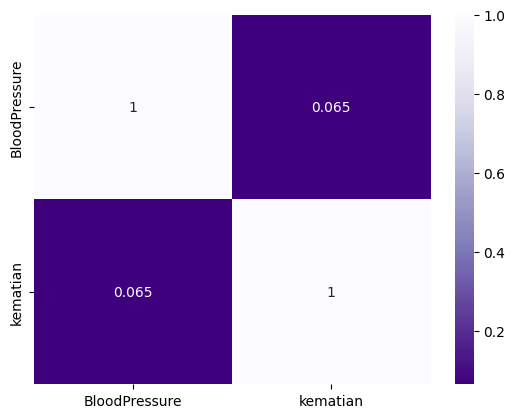

In [7]:
korelasi = new_data.corr()
sns.heatmap(korelasi,cmap='Purples_r',annot=True)

In [8]:
X = df.iloc[:,0:8]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [9]:
y = df.iloc[:,-1]
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: kematian, Length: 768, dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
scaler = StandardScaler()

In [11]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(X.shape,X_test.shape,X_train.shape)

(768, 8) (614, 8) (154, 8)


In [14]:
from sklearn.naive_bayes import  GaussianNB

In [15]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [16]:
y_pred = model.predict(X_test)

In [17]:
X_train_pred = model.predict(X_train)
print(f"hasil training data : {metrics.accuracy_score(X_train_pred,y_train)}")

hasil training data : 0.8181818181818182


In [18]:
X_test_pred = model.predict(X_test)
print(f"hasil test data : {metrics.accuracy_score(X_test_pred,y_test)}")

hasil test data : 0.741042345276873


In [19]:
print(f"hasil prediksi {metrics.accuracy_score(y_test,y_pred)}")

hasil prediksi 0.741042345276873


In [20]:
print(f"hasil confusion matrix adalah {metrics.confusion_matrix(y_test,y_pred)}")

hasil confusion matrix adalah [[340  61]
 [ 98 115]]


In [22]:

new_data = [[5, 166, 72, 19, 175, 25.8, 0.587, 51]]
new_data_scaled = scaler.transform(new_data)
predicted_value = model.predict(new_data_scaled)
if predicted_value == 0:
    print("Pasien tidak terkena diabetes")
else:
    print("Pasien terkena diabetes")


Pasien terkena diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
